<a href="https://colab.research.google.com/github/temptitle/Sound/blob/master/3D_Sound_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [254]:
# %%capture
!wget -O preamble.wav https://www.dropbox.com/s/w89ebuf1jcpzvib/preamble.wav?dl=0

--2021-01-25 12:47:26--  https://www.dropbox.com/s/w89ebuf1jcpzvib/preamble.wav?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/w89ebuf1jcpzvib/preamble.wav [following]
--2021-01-25 12:47:26--  https://www.dropbox.com/s/raw/w89ebuf1jcpzvib/preamble.wav
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucef7b69da6166eb557ee54e1a08.dl.dropboxusercontent.com/cd/0/inline/BHrdm7b4VPrbMwU4cxApnefn8iE90Wq2zl72zn6JTGpuPIn0O5LlCifT9JEl3OnLYag5-U6-aqxdstGk8c3ECHJILVusfPuV3fm1vN1ZniTWDFDA3zIx3tmpWUofJYjjE9g/file# [following]
--2021-01-25 12:47:27--  https://ucef7b69da6166eb557ee54e1a08.dl.dropboxusercontent.com/cd/0/inline/BHrdm7b4VPrbMwU4cxApnefn8iE90Wq2zl72zn6JTGpuPIn0O5LlCifT9JEl3OnLYag5-U6-aqxdstGk8c3ECHJILVusfPuV3fm1vN1Zni

In [255]:
from scipy.io import wavfile
samplerate, data = wavfile.read('preamble.wav')
print("Sample rate: ", samplerate)

22050


1/10 (22000) секунди делей складає враження, що два чуваки говорять один повторяє за іншим. 1/20 - що два чуваки синхронно але стоять по обидва боки (а не зливаються)
1/40 - що один чувак зміщений

Найкраще це shift=300-500 при sample rate 22100


start+i+int(shift*source_y[i]) створює ефект руху зліва на право а start+i-int(shift*source_y[i]) з права на ліво


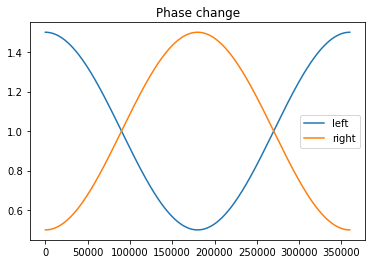

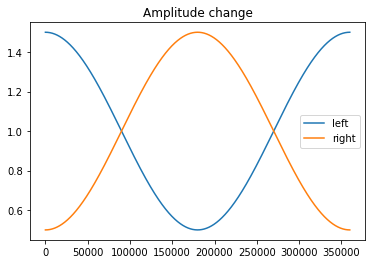

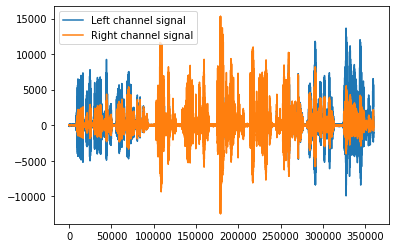

In [259]:
test_len = 360000
start = 0
shift = 200

# try 3d circle rotation effect
t = np.arange(0, test_len)

#The function of phase change over time
left_phase = 0.5*np.cos(2*np.pi*t/test_len)+1
right_phase = -0.5*np.cos(2*np.pi*t/test_len)+1
plt.title("Phase change")
plt.plot(t, left_phase, label="left")
plt.plot(t, right_phase, label="right")
plt.legend()
plt.show()

#The function of amplitude change over time
left_amplitude = 0.5*np.cos(2*np.pi*t/test_len)+1
right_amplitude = -0.5*np.cos(2*np.pi*t/test_len)+1
plt.title("Amplitude change")
plt.plot(t, left_amplitude, label="left")
plt.plot(t, right_amplitude, label="right")
plt.legend()
plt.show()

right_phased = []
left_phased = []

#Form a modulated signal from the original signal by changing phase and amplotude for different time
for i in range(test_len):
  left_phased.append(left_amplitude[i]*data[start+i+int(shift*left_phase[i])])
  right_phased.append(right_amplitude[i]*data[start+i+int(shift*right_phase[i])])

plt.plot(left_phased, label="Left channel signal")
plt.plot(right_phased, label="Right channel signal")
plt.legend()

import IPython.display as ipd
ipd.display(ipd.Audio([left_phased, right_phased], rate=samplerate, autoplay=True))

**TODO** Need to add HRTF filtering for more realistic feeling
https://codeandsound.wordpress.com/2015/03/11/creating-binaural-sound-head-related-transfer-functions/